# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [55]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")


In [56]:
penguins_clean = penguins_df.dropna()
penguins_df.describe()
# From the describe response it looks like flipper_length_mm do have outliers which need to be removed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [64]:
# Removing Outliers
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])
penguins_clean.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [58]:
# Create Dummy Variables and remove Categorical Feature
penguins_clean_dummies = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)
# Scaling the Data for Processing
scaler = StandardScaler()
S = scaler.fit_transform(penguins_clean_dummies)
penguins_preprocessed = pd.DataFrame(data=S,columns=penguins_clean_dummies.columns )
penguins_preprocessed.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,2.987267e-16,-1.707010e-16,5.121029e-16,-2.133762e-16,-2.533842e-17,-5.467765e-17
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.193202e+00,-2.069865e+00,-2.070010e+00,-1.874433e+00,-9.910312e-01,-1.003008e+00
25%,-8.319384e-01,-7.917442e-01,-7.862398e-01,-8.182278e-01,-9.910312e-01,-1.003008e+00
50%,8.783413e-02,7.737814e-02,-2.869957e-01,-1.969307e-01,-9.910312e-01,9.970015e-01
75%,8.420476e-01,7.931259e-01,8.541335e-01,7.350150e-01,1.009050e+00,9.970015e-01
max,2.865547e+00,2.224621e+00,2.137904e+00,2.598906e+00,1.009050e+00,9.970015e-01


In [59]:
# Initializing PCA to determine the number of components
model = PCA()
df_w_pca = model.fit(penguins_preprocessed)
df_w_pca.explained_variance_ratio_
# There are 2 components with a variance of over 10 %

array([0.51973484, 0.34424041, 0.08591863, 0.03225427, 0.01686049,
       0.00099136])

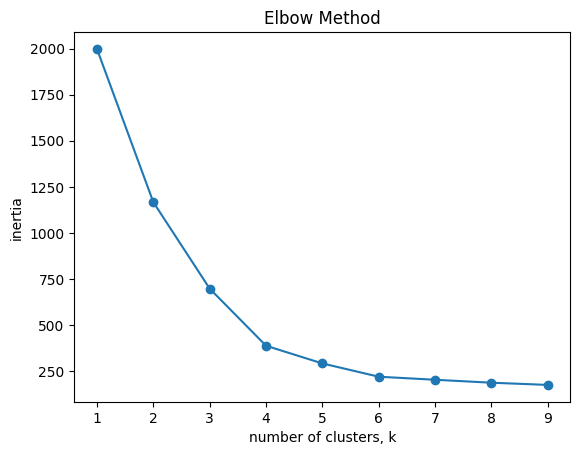

In [60]:
pca = PCA (n_components=2)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
ks = range(1, 10)
inertias=[]
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(penguins_preprocessed)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.xticks(ks)
plt.show()
# Based on this analysis, we should choose 4 clusters
n_clusters = 4

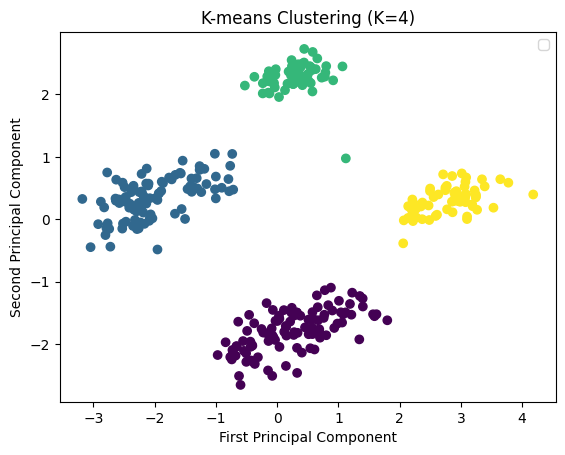

In [61]:
# Doing a Principal Component Analysis using chosen number of clusters
kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_cluster})')
plt.legend()
plt.show()


In [62]:
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
